In [123]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#sklearn package 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.ensemble import GradientBoostingClassifier

#model evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
#read the dataset
data = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v2.json',lines=True) # lines for avoid the trailing error
column = data.columns
column

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [83]:
data.drop(['link','date'],axis=1,inplace = True)
data.head(4)

,category,headline,authors,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...


In [84]:
data.describe()

,category,headline,authors,short_description
count,200853,200853,200853,200853
unique,41,199344,27993,178353
top,POLITICS,Sunday Roundup,,
freq,32739,90,36620,19712


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   authors            200853 non-null  object
 3   short_description  200853 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [86]:
print("The shape of the dataset-------->",data.shape)
print("The number of null values ------>")
print(data.isnull().sum())
column = data.columns
print("The column present there-------->",column)

The shape of the dataset--------> (200853, 4)
The number of null values ------>
category             0
headline             0
authors              0
short_description    0
dtype: int64
The column present there--------> Index(['category', 'headline', 'authors', 'short_description'], dtype='object')


# Category walkthrough

In [87]:
print("The total number category present here------------->",data['category'].nunique())
category=data['category'].value_counts()
print(category)

The total number category present here-------------> 41
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE 

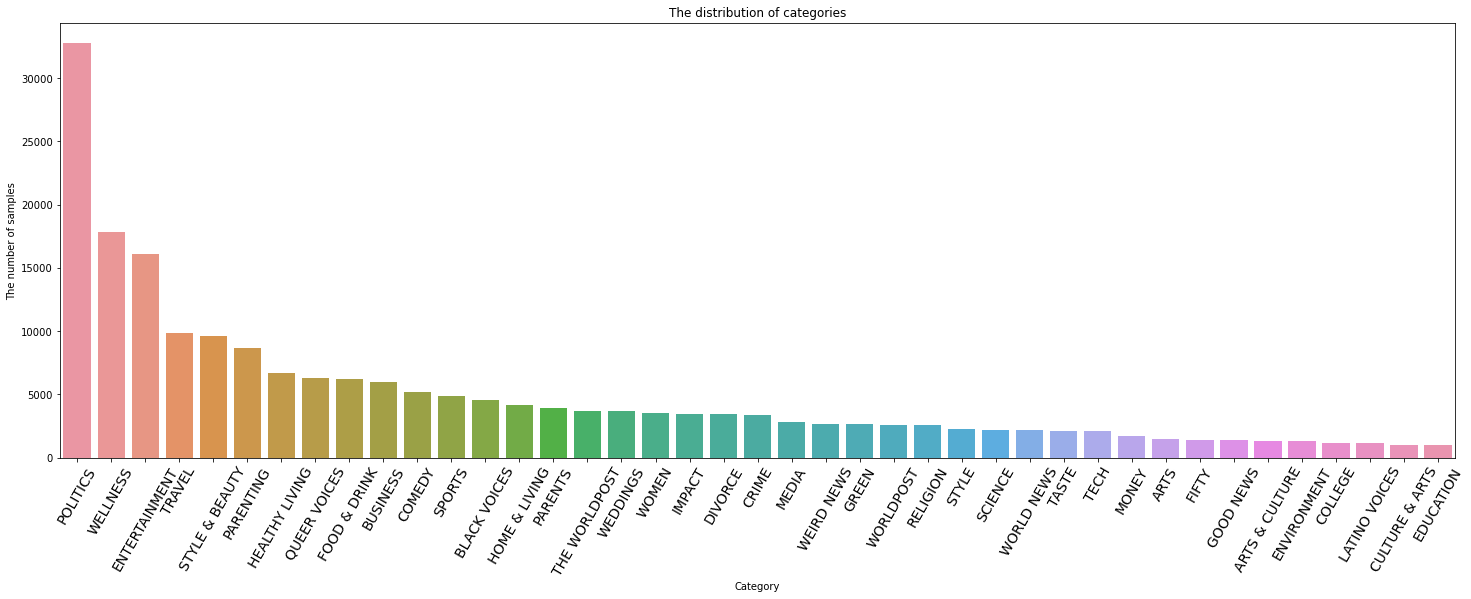

In [88]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

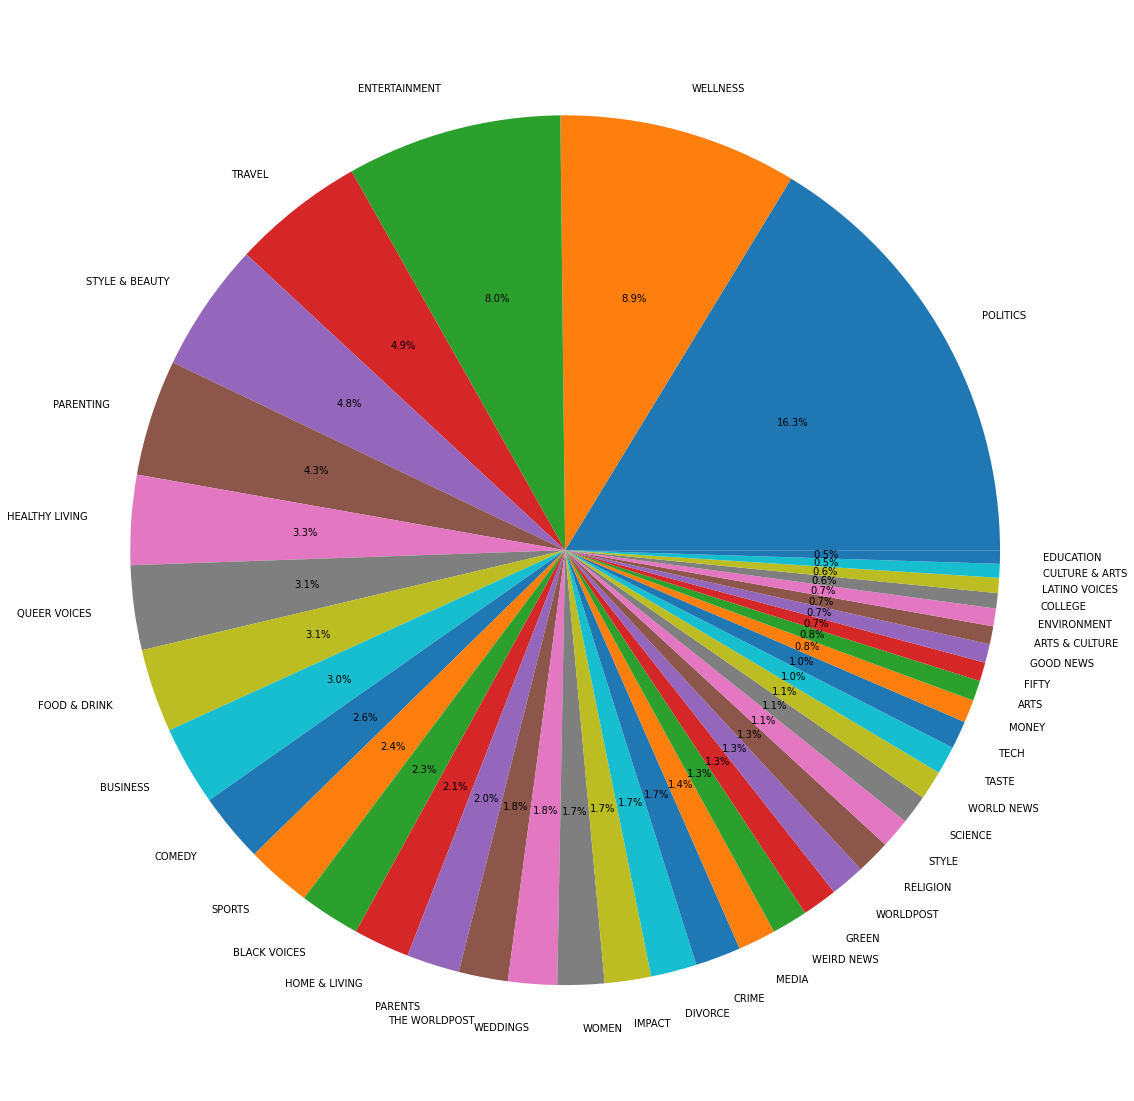

In [89]:
#pie chart 
plt.figure(figsize=(20,20))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()

In [90]:
categories = data['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            data.loc[data['category'] == ele, 'category'] = name

In [91]:
groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

groupper( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISC')

In [92]:
print("We have a total of {} categories now".format(data['category'].nunique()))
category = data['category'].value_counts()

We have a total of 19 categories now


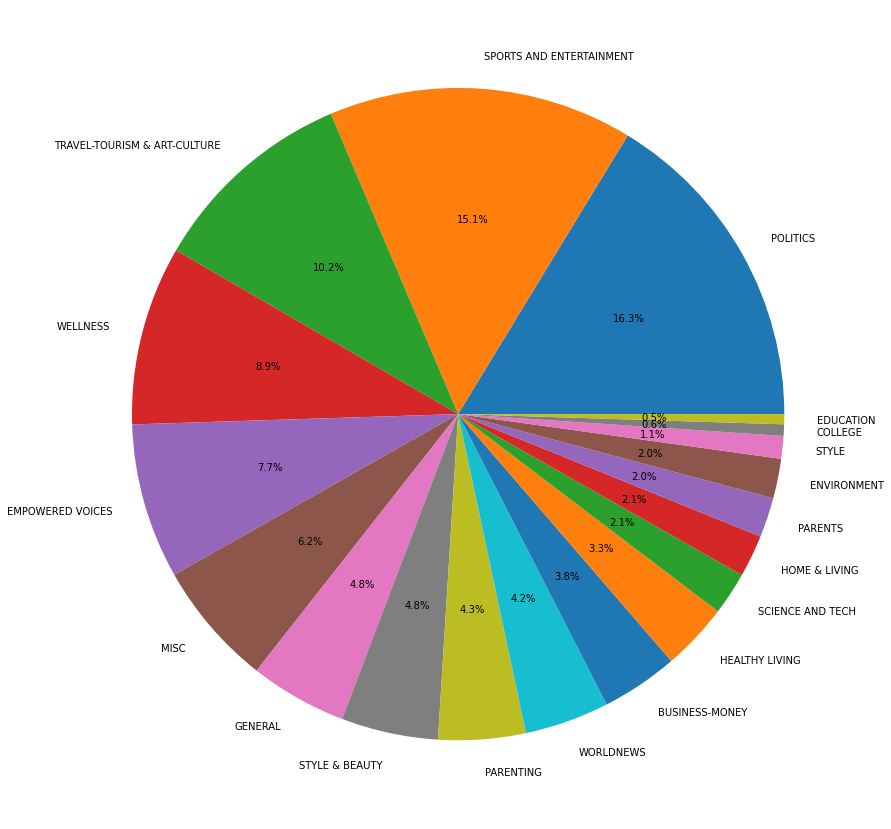

In [93]:
#pie chart 
plt.figure(figsize=(15,15))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()

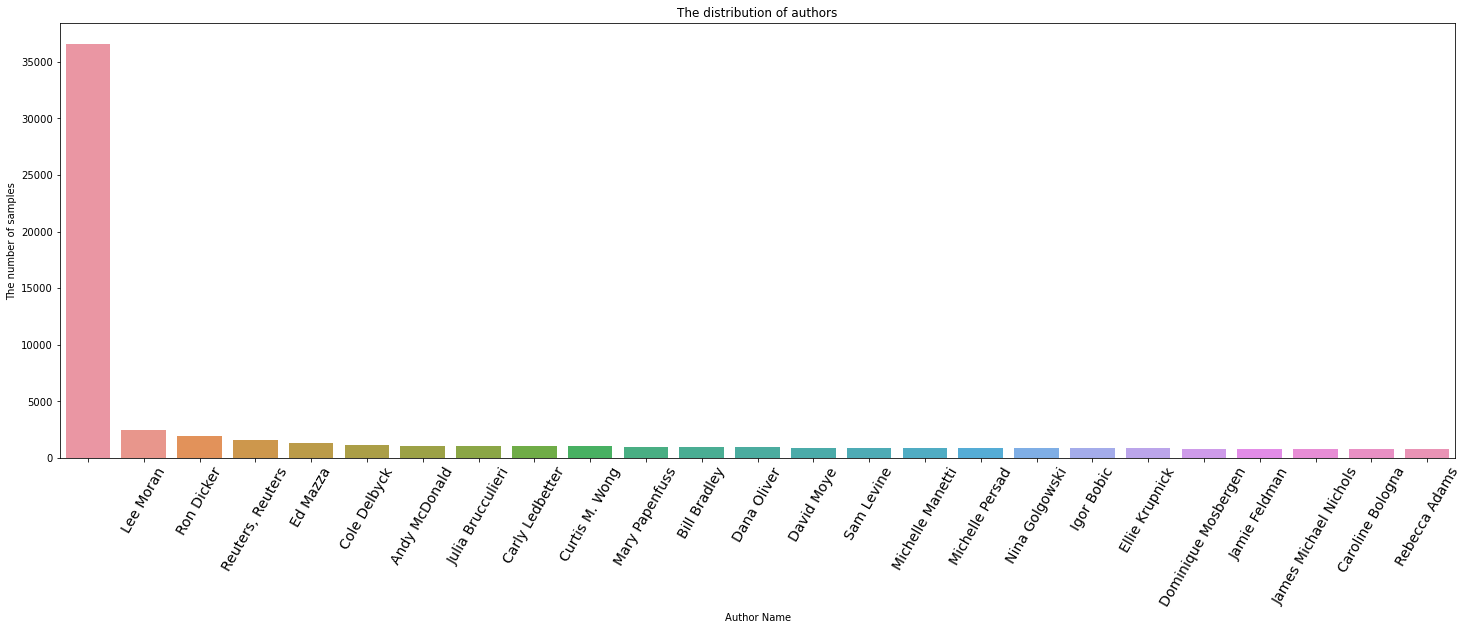

In [94]:
#auhtor plot
auhtor_count = data['authors'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(x=auhtor_count[:25].index,y=auhtor_count[:25].values)
plt.title("The distribution of authors")
plt.xlabel("Author Name")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

# handling Dublicate and null values

In [95]:
#delete the dublicate values
data.duplicated().sum() # count the total duplicate samples

446

In [96]:
data.drop_duplicates(keep='last',inplace=True)

In [97]:
#there can be dublicate of author names so check for the dublicate headline and short discription
data.duplicated(subset=['headline', 'short_description']).sum()

42

In [98]:
data.drop_duplicates(subset=['headline', 'short_description'],inplace=True,keep='last')

In [99]:
print("THe length of the datset after dublicate deletion------>",data.shape)

THe length of the datset after dublicate deletion------> (200365, 4)


# Handling null values

In [100]:
data.isnull().sum()

category             0
headline             0
authors              0
short_description    0
dtype: int64

In [101]:
# there is no null value instead of null they are blank so we need to check for the blank placess and delete that
data[data['headline'] == '']

,category,headline,authors,short_description
86893,MISC,,"Matthew Fox, ContributorRadical theologian Mat...",Let everyone not wrapped in tired and disprove...
113471,EMPOWERED VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",


In [102]:
# drop the blank values
headline_blank = data['headline'] == ''
data = data[~headline_blank]
print("THe length of the datset ------>",data.shape)

THe length of the datset ------> (200363, 4)


In [103]:
#drop the blank short describtion column
description_blank = data['short_description']==''
print("the lenth of the blank description samples----->",len(data[description_blank]))
data = data[~description_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank description samples-----> 19610
THe length of the datset ----------------------> (180753, 4)


In [104]:
#drop the null author samples
author_blank = data['authors']==''
print("the lenth of the blank auhtor samples---------->",len(data[author_blank]))
data = data[~author_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank auhtor samples----------> 32055
THe length of the datset ----------------------> (148698, 4)


In [105]:
data.head(5)

,category,headline,authors,short_description
0,GENERAL,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,SPORTS AND ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.
2,SPORTS AND ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...
3,SPORTS AND ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...
4,SPORTS AND ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ..."


In [106]:
#author 

# Column Combinning

In [107]:
data['text'] = data['authors']+'-'+data['headline']+'-'+data['short_description']

In [108]:
data.head(4)

,category,headline,authors,short_description,text
0,GENERAL,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,Melissa Jeltsen-There Were 2 Mass Shootings In...
1,SPORTS AND ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.,Andy McDonald-Will Smith Joins Diplo And Nicky...
2,SPORTS AND ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...,Ron Dicker-Hugh Grant Marries For The First Ti...
3,SPORTS AND ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...,Ron Dicker-Jim Carrey Blasts 'Castrato' Adam S...


In [109]:
#drop the other columns
data.drop(['authors','headline','short_description'],axis=1,inplace=True)

In [110]:
print("The lenth of the datset-------------------->",data.shape)
data.head(4)

The lenth of the datset--------------------> (148698, 2)


,category,text
0,GENERAL,Melissa Jeltsen-There Were 2 Mass Shootings In...
1,SPORTS AND ENTERTAINMENT,Andy McDonald-Will Smith Joins Diplo And Nicky...
2,SPORTS AND ENTERTAINMENT,Ron Dicker-Hugh Grant Marries For The First Ti...
3,SPORTS AND ENTERTAINMENT,Ron Dicker-Jim Carrey Blasts 'Castrato' Adam S...


In [111]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True) 
data.head(4)

,category,text
0,SPORTS AND ENTERTAINMENT,Andy McDonald-Vice Explores Whether Donald Tru...
1,POLITICS,Mary Papenfuss-Report: Trump Demanded Nondiscl...
2,WELLNESS,"Leila J. Milgrim, Contributor\nWriter living v..."
3,EMPOWERED VOICES,Roque Planas-Detainess In Family Detention Fil...


In [112]:
data.iloc[11,1]

"Cristian Farias-Supreme Court Denies North Carolina's Plea To Restore Swath Of Voting Restrictions-The state won't be able to enforce them come Election Day."

# test cleaning

In [113]:
corpus=[]
for i in range(100000):
    text = data.iloc[i,1]
    
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()
    
    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)
    
    if i%1000==0:
        print(i,end='->')
corpus[:20]

0->1000->2000->3000->4000->5000->6000->7000->8000->9000->10000->11000->12000->13000->14000->15000->16000->17000->18000->19000->20000->21000->22000->23000->24000->25000->26000->27000->28000->29000->30000->31000->32000->33000->34000->35000->36000->37000->38000->39000->40000->41000->42000->43000->44000->45000->46000->47000->48000->49000->50000->51000->52000->53000->54000->55000->56000->57000->58000->59000->60000->61000->62000->63000->64000->65000->66000->67000->68000->69000->70000->71000->72000->73000->74000->75000->76000->77000->78000->79000->80000->81000->82000->83000->84000->85000->86000->87000->88000->89000->90000->91000->92000->93000->94000->95000->96000->97000->98000->99000->

['andi mcdonald vice explor whether donald trump would even good 3d chess rememb everyon thought polit geniu yeah',
 'mari papenfuss report trump demand nondisclosur pact staffer never spill agreement forbid senior white hous staff member talk even trump presid end',
 'leila j milgrim contributor writer live vicari becom master fate lesson happi accept grab life b ll convers realiz take first step happi journey must accept well embrac immin truth enter world whatev given us dad answer lot life',
 'roqu plana detai famili detent file 10m medic neglect claim salvadoran woman broken finger say medic staff refus treat guard insult',
 'carolin bologna jimmi fallon judd apatow keanu reev perform stand written kid make moos float',
 'pamela yellen contributor founder bank financi secur expert bestsel student loan default caus next recess cost higher educ high rise import famili start plan colleg earli yet peopl know pitfal tradit colleg save plan',
 'rebecca adam tavi gevinson teach jimmi fal


# Tokazitation and Count Vectorization

In [138]:
#ifidf vectorizer
vecto = TfidfVectorizer(max_features=1500,ngram_range=(1,2))
X = vecto.fit_transform(corpus).toarray()
X.shape

(100000, 1500)

In [139]:
X[2]

array([0., 0., 0., ..., 0., 0., 0.])

In [140]:
#label encoding the target
label = LabelEncoder()
y = label.fit_transform(data['category'][:100000])

In [141]:
#train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [142]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (80000, 1500)
The X_text shape------> (20000, 1500)
THe y_train shape-----> (80000,)
The y_test shape------> (20000,)


# SVD

In [143]:
n_com = [20,30,50,70,90,100,200,300,400,500,600,700]
def models_prepare():
    model = {}
    for n in n_com:
        s = [('svd',TruncatedSVD(n_components = n)),('NaviBaye',GaussianNB())]
        model[str(n)] = Pipeline(steps = s)
    return model

def evaluate_model(model, X, y):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
    return scores

In [144]:
models = models_prepare()

In [145]:

models

{'20': Pipeline(steps=[('svd', TruncatedSVD(n_components=20)),
                 ('NaviBaye', GaussianNB())]),
 '30': Pipeline(steps=[('svd', TruncatedSVD(n_components=30)),
                 ('NaviBaye', GaussianNB())]),
 '50': Pipeline(steps=[('svd', TruncatedSVD(n_components=50)),
                 ('NaviBaye', GaussianNB())]),
 '70': Pipeline(steps=[('svd', TruncatedSVD(n_components=70)),
                 ('NaviBaye', GaussianNB())]),
 '90': Pipeline(steps=[('svd', TruncatedSVD(n_components=90)),
                 ('NaviBaye', GaussianNB())]),
 '100': Pipeline(steps=[('svd', TruncatedSVD(n_components=100)),
                 ('NaviBaye', GaussianNB())]),
 '200': Pipeline(steps=[('svd', TruncatedSVD(n_components=200)),
                 ('NaviBaye', GaussianNB())]),
 '300': Pipeline(steps=[('svd', TruncatedSVD(n_components=300)),
                 ('NaviBaye', GaussianNB())]),
 '400': Pipeline(steps=[('svd', TruncatedSVD(n_components=400)),
                 ('NaviBaye', GaussianNB())]),
 '

In [ ]:

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score {} of n_components is ---->{}".format(name,accuracy_score(y_test,y_pred)) )

# Model training

In [ ]:
#model training
NB = GaussianNB()
NB.fit(X_train,y_train)

#model prediction
y_pred = NB.predict(X_test)

#model evaluation
accuracy_sco = accuracy_score(y_test , y_pred)*100
print("The accuracy of the model is ------>",accuracy_sco)

#### training using gradiant boost

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))